In [2]:
## Pandas is a newer package built on top of NumPy, 
# and provides an efficient implementation of a DataFrame. 
# DataFrames are essentially multidimen‐ sional arrays with attached row and column labels, 
# and often with heterogeneous types and/or missing data.

## Pandas implements a number of powerful data operations 
# familiar to users of both database frameworks and spreadsheet programs.

In [3]:
## Introducing Pandas Objects
import pandas as pd
pd.__version__

'0.25.1'

In [4]:
## The Pandas Series Object
# A Pandas Series is a one-dimensional array of indexed data. 
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [9]:
## Series as generalized NumPy array
# From what we’ve seen so far, it may look like the Series object is basically 
# inter‐ changeable with a one-dimensional NumPy array. The essential difference 
# is the pres‐ ence of the index: while the NumPy array has an implicitly defined 
# integer index used to access the values, the Pandas Series has an explicitly defined index 
# associated with the values. For example, if we wish, we can use strings as an index:

data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [12]:
## Series as specialized dictionary
# In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary
population_dict = {'California': 38332521,
                               'Texas': 26448193,
                               'New York': 19651127,
                               'Florida': 19552860,
                               'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [13]:
population['California']

38332521

In [14]:
population['New York':'Illinois']

New York    19651127
Florida     19552860
Illinois    12882135
dtype: int64

In [15]:
##data can be a scalar, which is repeated to fill the specified index:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [16]:
##data can be a dictionary, in which index defaults to the sorted dictionary keys:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [17]:
## In each case, the index can be explicitly set if a different result is preferred:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

In [18]:
## The Pandas DataFrame Object
# the DataFrame can be thought of either as a gener‐ alization of a NumPy array, 
# or as a specialization of a Python dictionary

In [19]:
## DataFrame as a generalized NumPy array
import numpy as np
import pandas as pd

population_dict = {'California': 38332521,
                               'Texas': 26448193,
                               'New York': 19651127,
                               'Florida': 19552860,
                               'Illinois': 12882135}

population = pd.Series(population_dict)

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
                 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [20]:
# we can use this dictionary to construct a single 
# two-dimensional object containing this information:
states = pd.DataFrame({'population': population,'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [21]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [22]:
states.columns

Index(['population', 'area'], dtype='object')

In [23]:
## DataFrame as specialized dictionary
#Similarly, we can also think of a DataFrame as a specialization of a dictionary. 
#Where a dictionary maps a key to a value, a DataFrame maps a column name to a 
#Series of column data. 

In [24]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [25]:
# Notice the potential point of confusion here: in a two-dimensional NumPy array, 
#data[0] will return the first row. For a DataFrame, data['col0'] will return the first column.

In [26]:
## Constructing DataFrame objects
# A Pandas DataFrame can be constructed in a variety of ways.
## 1. From a single Series object.
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [27]:
## 2. From a list of dicts.
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [28]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [29]:
## 3. From a dictionary of Series objects.
pd.DataFrame({'population': population,
                          'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [30]:
## 4. From a two-dimensional NumPy array.
import numpy as np
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c'])

,foo,bar
a,0.038995,0.852187
b,0.662899,0.064699
c,0.335434,0.141606


In [31]:
## 5.From a NumPy structured array.
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [32]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [33]:
## The Pandas Index Object
# can be thought of either as an immutable array or as an ordered set 
#(technically a multiset, as Index objects may contain repeated values).
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [34]:
# Index as immutable array
ind[1]

3

In [35]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [36]:
#One difference between Index objects and NumPy arrays 
#is that indices are immuta‐ ble—that is, they cannot be modified via the normal means

In [37]:
##Index as ordered set
#Pandas objects are designed to facilitate operations such as joins across datasets, 
#which depend on many aspects of set arithmetic. 
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [38]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [39]:
indA ^ indB # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

In [40]:
## Data Selection in Series
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [41]:
data['b']

0.5

In [42]:
'a' in data

True

In [43]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [45]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [46]:
data[0:2]  # slicing by implicit integer index

a    0.25
b    0.50
dtype: float64

In [47]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [48]:
# fancy indexing 
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [49]:
## Indexers: loc, iloc, and ix
# These slicing and indexing conventions can be a source of confusion. 
# For example, if your Series has an explicit integer index, 
# an indexing operation such as data[1] will use the explicit indices, 
# while a slicing operation like data[1:3] will use the implicit Python-style index

data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [50]:
# explicit index when indexing 
data[1]

'a'

In [51]:
# implicit index when slicing 
data[1:3]

3    b
5    c
dtype: object

In [52]:
#Because of this potential confusion in the case of integer 
#indexes, Pandas provides some special indexer 
#attributes that explicitly expose certain indexing schemes.
data.loc[1]

'a'

In [53]:
# the loc attribute allows indexing and slicing that always references the explicit index
data.loc[1:3]

1    a
3    b
dtype: object

In [54]:
# iloc attribute allows indexing and slicing that always references the implicit Python-style index
data.iloc[1]

'b'

In [55]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [56]:
'''
One guiding principle of Python code is that “explicit is better than implicit.” 
The explicit nature of loc and iloc make them very useful in maintaining clean and read‐ able code;
especially in the case of integer indexes, I recommend using these both to 
make code easier to read and understand, 
and to prevent subtle bugs due to the mixed indexing/slicing convention
'''

'\nOne guiding principle of Python code is that “explicit is better than implicit.” \nThe explicit nature of loc and iloc make them very useful in maintaining clean and read‐ able code;\nespecially in the case of integer indexes, I recommend using these both to \nmake code easier to read and understand, \nand to prevent subtle bugs due to the mixed indexing/slicing convention\n'

In [57]:
## Data Selection in DataFrame
# DataFrame as a dictionary
area = pd.Series({'California': 423967, 'Texas': 695662,
                          'New York': 141297, 'Florida': 170312,
                          'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                         'New York': 19651127, 'Florida': 19552860,
                         'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [58]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [59]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [60]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [61]:
data['density(percentage)'] = data['density']*100
data

,area,pop,density,density(percentage)
California,423967,38332521,90.413926,9041.392608
Texas,695662,26448193,38.018740,3801.874042
New York,141297,19651127,139.076746,13907.674614
Florida,170312,19552860,114.806121,11480.612053
Illinois,149995,12882135,85.883763,8588.376279


In [62]:
## DataFrame as two-dimensional array
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01, 9.04139261e+03],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01, 3.80187404e+03],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02, 1.39076746e+04],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02, 1.14806121e+04],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01, 8.58837628e+03]])

In [63]:
# can transpose the full DataFrame to swap rows and columns:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01
density(percentage),9.041393e+03,3.801874e+03,1.390767e+04,1.148061e+04,8.588376e+03


In [64]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01, 9.04139261e+03])

In [65]:
 data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [66]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [67]:
data.loc[:'Florida', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [68]:
# The ix indexer allows a hybrid of these two approaches:
data.ix[:3, :'pop']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [69]:
#the loc indexer we can combine masking and fancy indexing as in the following:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [70]:
data[data.density > 100]

,area,pop,density,density(percentage)
New York,141297,19651127,139.076746,13907.674614
Florida,170312,19552860,114.806121,11480.612053


In [71]:
## Operating on Data in Pandas
# UFuncs: Index Alignment
# Index alignment in Series
# As an example, suppose we are combining two different data sources, 
# and find only the top three US states by area and the top three US states by population:
import numpy as np
import pandas as pd

area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                             'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                                   'New York': 19651127}, name='population')
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [72]:
# The resulting array contains the union of indices of the two input arrays, 
# which we could determine using standard Python set arithmetic on these indices:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [73]:
'''
Python operator   Pandas method(s)
+                 add()
-                 sub(), subtract()
*                 mul(), multiply()
/                 truediv(), div(), divide()
//                floordiv()
%                 mod()
**                pow()
'''

'\nPython operator   Pandas method(s)\n+                 add()\n-                 sub(), subtract()\n*                 mul(), multiply()\n/                 truediv(), div(), divide()\n//                floordiv()\n%                 mod()\n**                pow()\n'

In [74]:
## Handling Missing Data
# Missing Data in Pandas
# Operating on Null Values
#there are several useful methods for detecting, 
# removing, and replacing null values in Pandas data structures. They are:
# isnull() Generate a Boolean mask indicating missing values
# notnull() Opposite of isnull()
# dropna() Return a filtered version of the data
# fillna() Return a copy of the data with missing values filled or imputed

In [75]:
# Detecting null values
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [76]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [77]:
# Dropping null values
data.dropna()

0        1
2    hello
dtype: object

In [78]:
df = pd.DataFrame([[1, np.nan, 2],[2,3, 5],[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [79]:
# We cannot drop single values from a DataFrame; 
# we can only drop full rows or full columns. Depending on the application, 
# you might want one or the other, 
# so dropna() gives a number of options for a DataFrame.

In [80]:
# By default, dropna() will drop all rows in which any null value is present:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [81]:
# Alternatively, you can drop NA values along a different axis; axis=1 
# drops all col‐ umns containing a null value:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [82]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [83]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [84]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [85]:
# Filling null values
# Sometimes rather than dropping NA values, you’d rather replace them with a valid value.
import numpy as np
import pandas as pd

data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [86]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [87]:
#We can specify a forward-fill to propagate the previous value forward:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [88]:
# Or we can specify a back-fill to propagate the next values backward:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [89]:
df = pd.DataFrame([[1, np.nan, 2],[2,3, 5],[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [90]:
 df.fillna(method='ffill', axis=1)

,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


In [91]:
 df.fillna(method='ffill', axis=0)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [92]:
 df.fillna(method='ffill')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [93]:
## Hierarchical Indexing
# A Multiply Indexed Series
index = [('California', 2000), ('California', 2010),
                    ('New York', 2000), ('New York', 2010),
                    ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
                          18976457, 19378102,
                          20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [94]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [95]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [96]:
#The better way: Pandas MultiIndex
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [97]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [98]:
#  to access all data for which the second index is 2010
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [99]:
## MultiIndex as extra dimension
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [100]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [101]:
# we might want to add another column of demographic data for each 
# state at each year (say, population under 18); 
# with a MultiIndex this is as easy as adding another col‐ umn to the DataFrame:
pop_df = pd.DataFrame({'total': pop,
                        'under18': [9267089, 9284094,
                                    4687374, 4318033,
                                    5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [102]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [103]:
## Methods of MultiIndex Creation
df = pd.DataFrame(np.random.rand(4, 2),
                              index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                              columns=['data1', 'data2'])
df

data1     data2
a 1  0.383496  0.871979
  2  0.757165  0.159214
b 1  0.617534  0.842272
  2  0.289061  0.231103

In [104]:
# Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will 
# auto‐matically recognize this and use a MultiIndex by default:
import numpy as np
import pandas as pd

data = {('California', 2000): 33871648,
                    ('California', 2010): 37253956,
                    ('Texas', 2000): 20851820,
                    ('Texas', 2010): 25145561,
                    ('New York', 2000): 18976457,
                    ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [105]:
# MultiIndex for columns
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                       names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  38.1  42.0  37.6  34.0  37.5
     2      45.0  36.0  35.0  34.9  24.0  38.3
2014 1      47.0  37.6  54.0  37.8  25.0  38.4
     2      28.0  36.0  30.0  35.9  43.0  37.8

In [106]:
# This is fundamentally four-dimensional data, where the dimensions are the subject, 
# the measurement type, the year, and the visit number.
health_data['Guido']

type          HR  Temp
year visit            
2013 1      42.0  37.6
     2      35.0  34.9
2014 1      54.0  37.8
     2      30.0  35.9

In [107]:
# Indexing and Slicing a MultiIndex
# Indexing and slicing on a MultiIndex is designed to be intuitive, 
# and it helps if you think about the indices as added dimensions. 
# We’ll first look at indexing multiply indexed Series, and then multiply indexed DataFrames.

In [108]:
# Multiply indexed Series
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [109]:
pop['California', 2000]

33871648

In [110]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  38.1  42.0  37.6  34.0  37.5
     2      45.0  36.0  35.0  34.9  24.0  38.3
2014 1      47.0  37.6  54.0  37.8  25.0  38.4
     2      28.0  36.0  30.0  35.9  43.0  37.8

In [111]:
health_data['Guido', 'HR']

year  visit
2013  1        42.0
      2        35.0
2014  1        54.0
      2        30.0
Name: (Guido, HR), dtype: float64

In [112]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      44.0  38.1
     2      45.0  36.0

In [113]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        44.0
      2        45.0
2014  1        47.0
      2        28.0
Name: (Bob, HR), dtype: float64

In [114]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,44.0,42.0,34.0
2014,1,47.0,54.0,25.0


In [115]:
# Rearranging Multi-Indices
# One of the keys to working with multiply indexed data is 
# knowing how to effectively transform the data.

In [116]:
# Stacking and unstacking indices
health_data.unstack(level=0)

subject   Bob                   Guido                     Sue              \
type       HR        Temp          HR        Temp          HR        Temp   
year     2013  2014  2013  2014  2013  2014  2013  2014  2013  2014  2013   
visit                                                                       
1        44.0  47.0  38.1  37.6  42.0  54.0  37.6  37.8  34.0  25.0  37.5   
2        45.0  28.0  36.0  36.0  35.0  30.0  34.9  35.9  24.0  43.0  38.3   

subject        
type           
year     2014  
visit          
1        38.4  
2        37.8

In [117]:
health_data.unstack().stack()

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  38.1  42.0  37.6  34.0  37.5
     2      45.0  36.0  35.0  34.9  24.0  38.3
2014 1      47.0  37.6  54.0  37.8  25.0  38.4
     2      28.0  36.0  30.0  35.9  43.0  37.8

In [118]:
# Data Aggregations on Multi-Indices
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     44.5  37.05  38.5  36.25  29.0  37.9
2014     37.5  36.80  42.0  36.85  34.0  38.1

In [119]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,37.333333,37.066667
2014,37.833333,37.250000


In [120]:
# Combining Datasets: Concat and Append - combining different data sources.
# For convenience, we’ll define this function, which creates a 
# DataFrame of a particular form that will be useful below:
def make_df(cols, ind): 
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind) # example DataFrame

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [121]:
# Simple Concatenation with pd.concat
# Concatenation with joins

df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); 
print(df6); 
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [122]:
# By default, the join is a union of the input columns (join='outer'), 
# but we can change this to an intersection of the columns using join='inner'
print(df5); print(df6); print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [123]:
# The append() method
# Series and DataFrame objects have an append method that can accomplish 
#the same thing in fewer keystrokes. For example, rather than calling pd.concat([df1, df2]), 
# you can simply call df1.append(df2):
print(df5); print(df6); print(df5.append(df6))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [124]:
## Combining Datasets: Merge and Join
# Categories of Joins
# The pd.merge() function implements a number of types of joins: 
# the one-to-one, many-to-one, and many-to-many joins

In [125]:
## One-to-one joins - similar to the column-wise concatenation 
import numpy as np
import pandas as pd

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                        'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                        'hire_date': [2004, 2008, 2012, 2014]}) 
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [126]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [127]:
## Many-to-one joins - joins in which one of the two key columns contains duplicate entries
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                               'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [128]:
#The resulting DataFrame has an additional column with the “supervisor” information, 
#where the information is repeated in one or more locations as required by the inputs

In [129]:
## Many-to-many joins
#If the key column in both the left and right array contains duplicates, 
#then the result is a many-to-many merge
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                                         'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                      'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [130]:
## Specification of the Merge Key
# The on keyword
#Most simply, you can explicitly specify the name of the key column using the on key‐ word, 
#which takes a column name or a list of column names:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [131]:
#This option works only if both the left and right DataFrames have the specified column name.

In [132]:
## The left_on and right_on keywords
# At times you may wish to merge two datasets with different column names; 
# for example, we may have a dataset in which the employee name is labeled as “name” rather 
# than “employee”. In this case, we can use the left_on and right_on keywords to specify 
# the two column names:

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [133]:
#The result has a redundant column that we can drop if desired—for example, 
#by using the drop() method of DataFrames:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [134]:
# The left_index and right_index keywords
#Sometimes, rather than merging on a column, you would instead like to merge on an index. 
#For example, your data might look like this:
df1a = df1.set_index('employee') 
df2a = df2.set_index('employee') 
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [135]:
#You can use the index as the key for merging by specifying 
#the left_index and/or right_index flags in pd.merge():

print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [136]:
#For convenience, DataFrames implement the join() method, 
#which performs a merge that defaults to joining on indices:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [137]:
#If you’d like to mix indices and columns, you can combine left_index with right_on 
#or left_on with right_index to get the desired behavior:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [138]:
## Specifying Set Arithmetic for Joins
# This comes up when a value appears in one key column but not the other. Consider this example:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                                'food': ['fish', 'beans', 'bread']},
                               columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                                'drink': ['wine', 'beer']},
columns=['name', 'drink']) 
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [139]:
#Here we have merged two datasets that have only a single “name” entry in common: 
#Mary. By default, the result contains the intersection of the two sets of inputs; 
#this is what is known as an inner join. 
#We can specify this explicitly using the how keyword, which defaults to 'inner':
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [140]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [141]:
# The left join and right join return join over the left entries 
# and right entries, respectively. For example:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [142]:
## Overlapping Column Names: The suffixes Keyword
#you may end up in a case where your two input DataFrames have conflicting column names.
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                                'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [143]:
#Because the output would have two conflicting column names, the merge function automatically 
#appends a suffix _x or _y to make the output columns unique. If these defaults are inappropriate, 
#it is possible to specify a custom suffix using the suffixes keyword:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [144]:
## Example: US States Data
#Merge and join operations come up most often when one is combining data from different sources
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

print(pop.head());  

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0


In [145]:
print(areas.head());

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


In [146]:
print(abbrevs.head())

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [147]:
print(pop)

     state/region     ages  year   population
0              AL  under18  2012    1117489.0
1              AL    total  2012    4817528.0
2              AL  under18  2010    1130966.0
3              AL    total  2010    4785570.0
4              AL  under18  2011    1125763.0
...           ...      ...   ...          ...
2539          USA    total  2010  309326295.0
2540          USA  under18  2011   73902222.0
2541          USA    total  2011  311582564.0
2542          USA  under18  2012   73708179.0
2543          USA    total  2012  313873685.0

[2544 rows x 4 columns]


In [148]:
print(areas)

                   state  area (sq. mi)
0                Alabama          52423
1                 Alaska         656425
2                Arizona         114006
3               Arkansas          53182
4             California         163707
5               Colorado         104100
6            Connecticut           5544
7               Delaware           1954
8                Florida          65758
9                Georgia          59441
10                Hawaii          10932
11                 Idaho          83574
12              Illinois          57918
13               Indiana          36420
14                  Iowa          56276
15                Kansas          82282
16              Kentucky          40411
17             Louisiana          51843
18                 Maine          35387
19              Maryland          12407
20         Massachusetts          10555
21              Michigan          96810
22             Minnesota          86943
23           Mississippi          48434


In [149]:
areas

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707
5,Colorado,104100
6,Connecticut,5544
7,Delaware,1954
8,Florida,65758
9,Georgia,59441


In [150]:
areas['state']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8                  Florida
9                  Georgia
10                  Hawaii
11                   Idaho
12                Illinois
13                 Indiana
14                    Iowa
15                  Kansas
16                Kentucky
17               Louisiana
18                   Maine
19                Maryland
20           Massachusetts
21                Michigan
22               Minnesota
23             Mississippi
24                Missouri
25                 Montana
26                Nebraska
27                  Nevada
28           New Hampshire
29              New Jersey
30              New Mexico
31                New York
32          North Carolina
33            North Dakota
34                    Ohio
35                Oklahoma
36                  Oregon
3

In [151]:
# Given this information, say we want to compute a relatively straightforward result: 
# rank US states and territories by their 2010 population density. 
# We clearly have the data here to find this result, but we’ll have to combine the datasets 
# to get it. We’ll start with a many-to-one merge that will give us the full state name 
# within the population DataFrame. We want to merge based on the state/region column of pop, 
# and the abbreviation column of abbrevs. We’ll use how='outer' to make sure no data is thrown 
# away due to mismatched labels.

In [152]:
merged = pd.merge(pop, abbrevs, how='outer',
                              left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info 
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [153]:
#Let’s double-check whether there were any mismatches here, 
#which we can do by looking for rows with nulls:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [154]:
#Some of the population info is null; let’s figure out which these are! 
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [155]:
#It appears that all the null population values are from Puerto Rico prior to the year 2000; 
#this is likely due to this data not being available from the original source.

In [156]:
#More importantly, we see also that some of the new state entries are also null, 
#which means that there was no corresponding entry in the abbrevs key! 
# Let’s figure out which regions lack this match:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [157]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [158]:
# Now we can merge the result with the area data using a similar procedure. Examining
# our results, we will want to join on the state column in both:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [159]:
#Again, let’s check for nulls to see if there were any mismatches:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [160]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [161]:
#We see that our areas DataFrame does not contain the area of the United States as a whole. 
#We could insert the appropriate value (using the sum of all state areas, for instance), 
#but in this case we’ll just drop the null values because the population density
#of the entire United States is not relevant to our current discussion:

In [162]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [163]:
#Now we have all the data we need. To answer the question of interest, 
#let’s first select the portion of the data corresponding with the year 2000, 
#and the total population. We’ll use the query() function to do this quickly

In [164]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [165]:
#Now let’s compute the population density and display it in order. 
#We’ll start by rein‐ dexing our data on the state, and then compute the result:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [166]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [167]:
#The result is a ranking of US states plus Washington, DC, and Puerto Rico 
#in order of their 2010 population density, in residents per square mile. 
#We can see that by far the densest region in this dataset is Washington, DC 
#(i.e., the District of Columbia); among states, the densest is New Jersey.
#We can also check the end of the list:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [168]:
## Aggregation and Grouping
import seaborn as sns
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [169]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [170]:
#Simple Aggregation in Pandas
# As with a one- dimensional NumPy array, for a Pandas Series the 
# aggregates return a single value:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [171]:
ser.sum()

2.811925491708157

In [172]:
ser.mean()

0.5623850983416314

In [173]:
# For a DataFrame, by default the aggregates return results within each column:
df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [174]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [175]:
## By specifying the axis argument, you can instead aggregate within each row:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [176]:
#pandas Series and DataFrames include all of the common aggregates mentioned in 
#“Aggregations: Min, Max, and Everything in Between” on page 58; 
#in addition, there is a convenience method describe() that computes several common aggregates 
#for each column and returns the result
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [177]:
'''
Table 3-3. Listing of Pandas aggregation methods
Aggregation
count() 
first() 
last() 
mean(),
median() 
min(), 
max() 
std(), 
var() 
mad()    #Mean absolute deviation
prod()
sum()
'''

'\nTable 3-3. Listing of Pandas aggregation methods\nAggregation\ncount() \nfirst() \nlast() \nmean(),\nmedian() \nmin(), \nmax() \nstd(), \nvar() \nmad()    #Mean absolute deviation\nprod()\nsum()\n'

In [178]:
## GroupBy: Split, Apply, Combine
#.The split step involves breaking up and grouping a DataFrame depending on the 
 #value of the specified key.
#• The apply step involves computing some function, usually an aggregate, 
  #transformation, or filtering, within the individual groups.
#• The combine step merges the results of these operations into an output array.

In [179]:
 df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [180]:
# We can compute the most basic split-apply-combine operation with the groupby() 
# method of DataFrames, passing the name of the desired key column:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [181]:
# The most important operations made available by a GroupBy are aggregate, filter, 
# transform, and apply
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [182]:
# Iteration over groups. 
#The GroupBy object supports direct iteration over the groups, 
#returning each group as a Series or DataFrame:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [183]:
## you can use the describe() method of DataFrames to perform a set of 
# aggregations that describe each group in the data:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [184]:
# Aggregate, filter, transform, apply
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df                          

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [185]:
# Aggregation
#  aggregate() method allows for even more flexibility. 
# It can take a string, a function, or a list thereof, and compute all the aggregates at once
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [186]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [187]:
#Filtering. A filtering operation allows you to drop data based on the group properties
def filter_func(x):
    return x['data2'].std() > 4 
print(df); 
print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [188]:
# Transformation. While aggregation must return a reduced version of the data, 
# transformation can return some transformed version of the full data to recombine. 
# For such a transformation, the output is the same shape as the input
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [189]:
# The apply() method. 
#The apply() method lets you apply an arbitrary function to the group results.
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x
print(df); 
print(df.groupby('key').apply(norm_by_data2))
df

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [190]:
# Grouping example
# in a couple lines of Python code we can put all these together and count 
# discovered planets by method and by decade:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [191]:
## Pivot Tables
import numpy as np 
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [192]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [193]:
# look at survival by both sex and, say, class
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [194]:
# Pivot Table Syntax
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [195]:
#the survival gradient favors both women and higher classes. 
#First-class women survived with near certainty

In [196]:
# Multilevel pivot tables
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [197]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [198]:
# Additional pivot table options
titanic.pivot_table(index='sex', columns='class',
                               aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [199]:
# At times it’s useful to compute totals along each grouping. 
# This can be done via the margins keyword:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [200]:
## Here this automatically gives us information about the class-agnostic survival rate by gender, 
#the gender-agnostic survival rate by class, and the overall survival rate of 38%. 
#The margin label can be specified with the margins_name keyword, which defaults to "All"

In [201]:
# Example: Birthrate Data
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [202]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


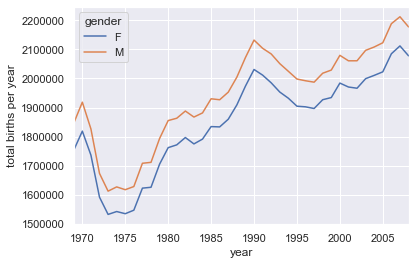

In [203]:
# We immediately see that male births outnumber female births in every decade. 
#To see this trend a bit more clearly, we can use the built-in plotting tools 
# in Pandas to visual‐ ize the total number of births by year
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year');

In [204]:
#With a simple pivot table and plot() method, we can immediately see the annual trend in births 
#by gender. By eye, it appears that over the past 50 years male births have outnumbered 
#female births by around 5%

In [205]:
##Further data exploration
#Though this doesn’t necessarily relate to the pivot table, there are a few more interesting 
#features we can pull out of this dataset using the Pandas tools covered up to this point. 
#We must start by cleaning the data a bit, removing outliers caused by mistyped dates 
#(e.g., June 31st) or missing values (e.g., June 99th). 
#One easy way to remove these all at once is to cut outliers; 
#we’ll do this via a robust sigma-clipping operation:

In [206]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [207]:
#The final line above is a robust estimate of the sample mean, where the 0.74 
#comes from the interquartile range of a Gaussian distribution
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [208]:
# set 'day' column to integer; it originally was a string due to nulls 
births['day'] = births['day'].astype(int)

In [209]:
# create a datetime index from the year, month, day. 
# This allows us to quickly compute the weekday corresponding to each row:
births.index = pd.to_datetime(10000 * births.year +
                                          100 * births.month +
                                          births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

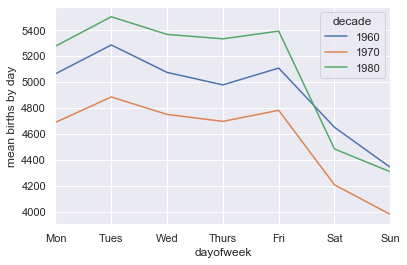

In [210]:
# Using this we can plot births by weekday for several decades.
import matplotlib.pyplot as plt 
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                        columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [211]:
#Apparently births are slightly less common on weekends than on weekdays! 
#Note that the 1990s and 2000s are missing because the CDC data 
#contains only the month of birth starting in 1989.
#Another interesting view is to plot the mean number of births by the day of the year.
#Let’s first group the data by month and day separately

In [212]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [213]:
##The result is a multi-index over months and days

In [214]:
# o make this easily plottable, let’s turn these months and days into a date 

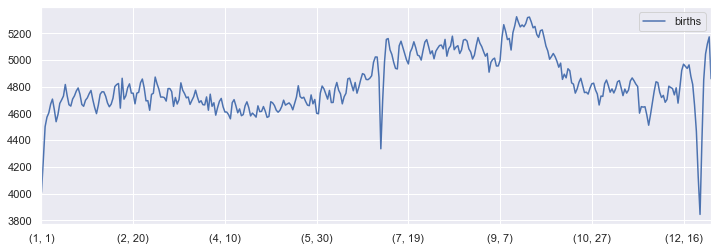

In [215]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax);

In [216]:
#In particular, the striking feature of this graph is the dip in birthrate on US holidays 
#(e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year’s Day) although this 
#likely reflects trends in scheduled/induced births rather than some deep 
#psychosomatic effect on natural births

In [217]:
## Vectorized String Operations
import numpy as np
data = ['peter', 'Paul', 'MARY', 'gUIDO'] 
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [218]:
# This is perhaps sufficient to work with some data, 
#but it will break if there are any missing values
data = ['peter', 'Paul', None, 'MARY', 'gUIDO'] 
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [ ]:
#Pandas includes features to address both this need for vectorized string operations 
#and for correctly handling missing data via the str attribute of Pandas Series and 
#Index objects containing strings

In [ ]:
import pandas as pd 
names = pd.Series(data)
names

In [ ]:
names.str.capitalize()

In [ ]:
#Tables of Pandas String Methods
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                              'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [ ]:
#Methods similar to Python string methods
'''
len() lower() ljust() upper() rjust() find() center() rfind() zfill() index() 
strip() rindex() rstrip() capitalize() lstrip() swapcase()
translate()
startswith()
endswith()
isalnum()
isalpha()
isdigit()
isspace()
istitle()
islower()
isupper()
isnumeric()
isdecimal()
split()
rsplit()
partition()
rpartition()
'''

In [ ]:
monte.str.lower()

In [ ]:
monte.str.len()

In [ ]:
'''
Table 3-4. Mapping between Pandas methods and functions in Python’s re module

Method         Description
match()        Callre.match()on each element, returning a Boolean.
extract()      Callre.match()on each element, returning matched groups as strings.
findall()      Callre.findall()on each element.
replace()      Replace occurrences of pattern with some other string.
contains()     Callre.search()on each element, returning a Boolean.
count()        Count occurrences of pattern.
split()        Equivalent tostr.split(), but accepts regexps.
rsplit()       Equivalent tostr.rsplit(), but accepts regexps.
'''

In [ ]:
monte.str.extract('([A-Za-z]+)')

In [ ]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

In [ ]:
## Example: Recipe Database
#These vectorized string operations become most useful in the 
#process of cleaning up messy, real-world data


In [ ]:
# read the entire file into a Python array 
with open('data/recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list 
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [ ]:
## Working with Time Series
#Pandas was developed in the context of financial modeling, so as you might expect, 
#it contains a fairly extensive set of tools for working with dates, times, and time- indexed data

In [ ]:
# • Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).
# • Time intervals and periods reference a length of time between a particular beginning and end point—for example, the year 2015. Periods usually reference a spe‐ cial case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).
# • Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

In [ ]:
## Dates and Times in Python
# While the time series tools provided by Pandas tend to be the most useful for data science 
# applications, it is helpful to see their relationship to other packages used in Python

In [ ]:
# Native Python dates and times: datetime and dateutil
# Python’s basic objects for working with dates and times reside in the built-in date time module. 
# Along with the third-party dateutil module, you can use it to quickly perform a host of useful 
# functionalities on dates and times. For example, you can manually build a date using the datetime 
# type:

In [ ]:
from datetime import datetime 
datetime(year=2015, month=7, day=4)

In [ ]:
# Or, using the dateutil module, you can parse dates from a variety of string formats:
from dateutil import parser
date = parser.parse("4th of July, 2015") 
date

In [ ]:
date.strftime('%A')

In [ ]:
# A related package to be aware of is pytz, which contains tools for working with the most migraine
# inducing piece of time series data: time zones.

In [ ]:
import numpy as np
date = np.array('1991-06-21', dtype=np.datetime64) 
date

In [ ]:
date + np.arange(12)

In [ ]:
# Pandas Time Series: Indexing by Time
#Where the Pandas time series tools really become useful is 
#when you begin to index data by timestamps.
import numpy as np
import pandas as pd
import datetime

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                                      '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

In [ ]:
data['2014-07-04':'2015-07-04']

In [ ]:
data['2015']

In [ ]:
## Pandas Time Series Data Structures
#• For time stamps, Pandas provides the Timestamp type. As mentioned before, 
#it is essentially a replacement for Python’s native datetime, but is based on the more 
#efficient numpy.datetime64 data type. The associated index structure is DatetimeIndex.

#• For time periods, Pandas provides the Period type. This encodes a fixed- frequency 
#interval based on numpy.datetime64. The associated index structure is PeriodIndex.

#• For time deltas or durations, Pandas provides the Timedelta type. 
#Timedelta is a more efficient replacement for Python’s native datetime.timedelta type, 
#and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

In [ ]:
#dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])
#dates

In [ ]:
# Regular sequences: pd.date_range()
# To make the creation of regular date sequences more convenient, 
# Pandas offers a few functions for this purpose: pd.date_range() for timestamps, 
# pd.period_range() for periods, and pd.timedelta_range() for time deltas

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

In [ ]:
pd.date_range('2015-07-03', periods=8)

In [ ]:
# hourly timestamp
pd.date_range('2015-07-03', periods=8, freq='H')

In [ ]:
# monthly periods 
pd.period_range('2015-07', periods=8, freq='M')

In [ ]:
# sequence of durations increasing by an hour
pd.timedelta_range(0, periods=10, freq='H')

In [ ]:
## Frequencies and Offsets
# Table 3-7. Listing of Pandas frequency codes
'''
Code Description
D Calendar day
W Weekly
M Month end
Q Quarter end
A Year end
H Hours
T Minutes
S Seconds
L Milliseonds
U Microseconds 
N Nanoseconds
B Business Day
BM Business month end
BQ business quarter end
BA Business year end
BH business hours
'''

In [ ]:
'''
Table 3-8. Listing of start-indexed frequency codes
Code Description
MS Month start
BMS Business month start QS Quarter start
BQS Business quarter start AS Year start
BAS Business year start
'''

In [ ]:
'''
Additionally, you can change the month used to mark any quarterly or annual code 
by adding a three-letter month code as a suffix:
• Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc. • A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.
In the same way, you can modify the split-point of the weekly frequency by adding a three-letter weekday code:
• W-SUN, W-MON, W-TUE, W-WED, etc.
'''

In [ ]:
#On top of this, codes can be combined with numbers to specify other frequencies. 
#For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:
pd.timedelta_range(0, periods=9, freq="2H30T")

In [ ]:
# we can create a busi‐ ness day offset directly as follows:
from pandas.tseries.offsets import BDay 
pd.date_range('2015-07-01', periods=5, freq=BDay())

In [ ]:
##Resampling, Shifting, and Windowing
#The ability to use dates and times as indices to intuitively organize and access data 
#is an important piece of the Pandas time series tools. The benefits of indexed data in 
#general (automatic alignment during operations, intuitive data slicing and access, etc.)

# Pandas was developed largely in a finance context, it includes some very spe‐ cific tools for financial data
# For example, the accompanying pandas-datareader package knows how to import  financial data 
# from a number of available sources, including Yahoo finance, Google Finance, and others. 
# Here we will load Google’s closing price history:

In [227]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',data_source='yahoo')
goog    

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086
...,...,...,...,...,...,...
2015-12-24,751.349976,746.619995,749.549988,748.400024,527200.0,748.400024
2015-12-28,762.989990,749.520020,752.919983,762.510010,1515300.0,762.510010
2015-12-29,779.979980,766.429993,766.690002,776.599976,1765000.0,776.599976


In [226]:
#For simplicity, we’ll use just the closing price:
goog = goog['Close']

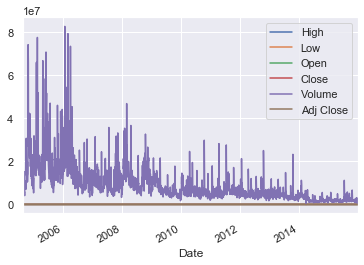

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

In [ ]:
## Resampling and converting frequencies
# One common need for time series data is resampling at a higher or lower frequency. 
#You can do this using the resample() method, or the much simpler asfreq()
#method. The primary difference between the two is that resample() 
#is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

In [ ]:
#Taking a look at the Google closing price, let’s compare what the two return when we 
#down-sample the data. Here we will resample the data at the end of business year

In [ ]:
#BA - Business year end
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

In [ ]:
# Notice the difference: at each point, resample reports the average of the previous year,
# while asfreq reports the value at the end of the year.

In [ ]:
## Here, we will resample the business day data at a daily frequency (i.e., including weekends)

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

In [ ]:
# The top panel is the default: non-business days are left as NA values 
#and do not appear on the plot. The bottom panel shows the differences between 
#two strategies for filling the gaps: forward-filling and backward-filling

In [ ]:
## Time-shifts
# Another common time series–specific operation is shifting of data in time. 
#Pandas has two closely related methods for computing this: shift() and tshift(). 
#In short, the difference between them is that shift() shifts the data, while tshift() 
# shifts the index.

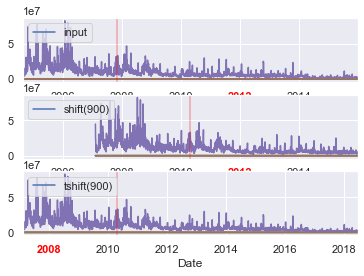

In [229]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
            
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
            
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

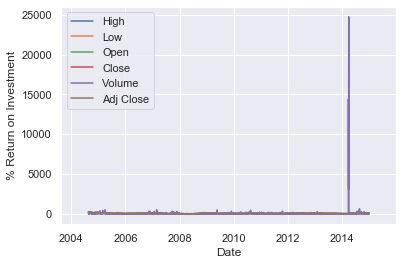

In [230]:
# A common context for this type of shift is computing differences over time. 
# For example, we use shifted values to compute the one-year return on 
# investment for Google stock over the course of the dataset

ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

In [231]:
##Rolling windows
#Rolling statistics are a third type of time series–specific operation implemented by Pandas. 
#These can be accomplished via the rolling() attribute of Series and Data Frame objects, 
#which returns a view similar to what we saw with the groupby operation

In [235]:
#For example, here is the one-year centered rolling mean and standard deviation 
#of the Google stock prices
#rolling = goog.rolling(365, center=True)
#data = pd.DataFrame({'input': goog,'one-year rolling_mean': rolling.mean(),'one-year rolling_std': rolling.std()})
#ax = data.plot(style=['-', '--', ':'])
#ax.lines[0].set_alpha(0.3)

In [236]:
# Example: Visualizing Seattle Bicycle Counts
#As a more involved example of working with some time series data, 
#let’s take a look at bicycle counts on Seattle’s Fremont Bridge. 
#This data comes from an automated bicy‐ cle counter, installed in late 2012

In [237]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [238]:
#For convenience, we’ll further process this dataset by shortening the column names 
#and adding a “Total” column:

In [243]:
data.columns = ['West', 'East', 'Total_Old']
data['Total'] = data.eval('West + East')
data.dropna().describe()

,West,East,Total_Old,Total
count,63494.000000,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240,166.761537
std,145.595300,67.396191,90.635793,208.003916
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000,21.000000
50%,61.000000,29.000000,30.000000,91.000000
75%,149.000000,70.000000,74.000000,220.000000
max,1097.000000,698.000000,850.000000,1569.000000


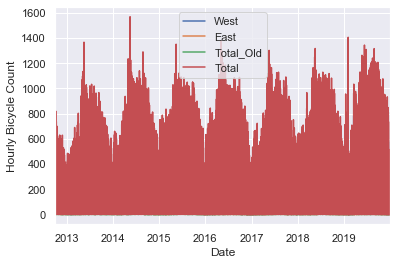

In [244]:
#Visualizing the data
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

In [245]:
# The ~25,000 hourly samples are far too dense for us to make much sense of. 
# We can gain more insight by resampling the data to a coarser grid. Let’s resample by week

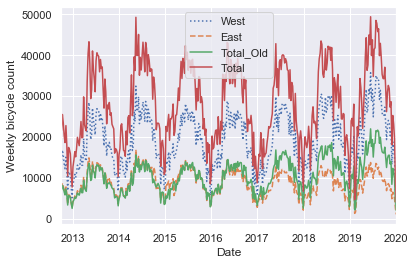

In [246]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

In [247]:
# Another way that comes in handy for aggregating the data is to use a rolling mean, 
#utilizing the pd.rolling_mean() function. 
# Here we’ll do a 30-day rolling mean of our data, making sure to center the window 

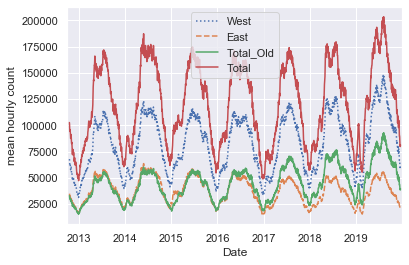

In [248]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

In [249]:
#The jaggedness of the result is due to the hard cutoff of the window. 
#We can get a smoother version of a rolling mean using a window function—for example, 
#a Gaussian window. The following code specifies both the width of the window 
#(we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

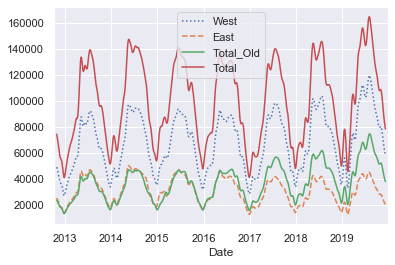

In [250]:
daily.rolling(50, center=True,
                  win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [251]:
##Digging into the data
#While the smoothed data views in Figure 3-14 are useful to get an idea of the general 
#trend in the data, they hide much of the interesting structure. For example, we might want 
#to look at the average traffic as a function of the time of day. We can do this using 
#the GroupBy functionality 

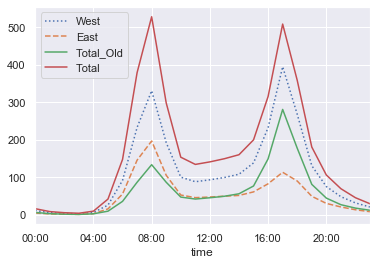

In [252]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [253]:
#The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and
#5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing 
#the bridge. This is further evidenced by the differences between the western sidewalk

In [254]:
#We also might be curious about how things change based on the day of the week. 
#Again, we can do this with a simple groupby

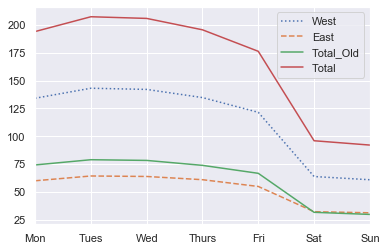

In [255]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [256]:
#This shows a strong distinction between weekday and weekend totals, with around twice as many 
#average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

In [257]:
# With this in mind, let’s do a compound groupby and look at the hourly trend on weekdays versus 
#weekends. We’ll start by grouping by both a flag marking the week‐ end, and the time of day:

In [258]:
#Now we’ll use some of the Matplotlib tools described in “Multiple Subplots” on page 262 
#to plot two panels side by side

TypeError: Cannot index by location index with a non-integer key

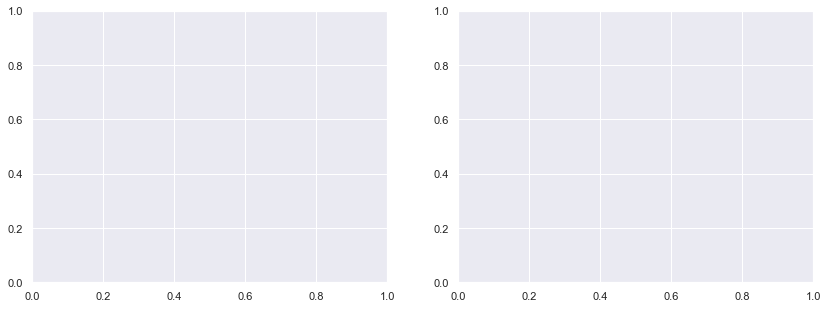

In [266]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                                       xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                                       xticks=hourly_ticks, style=[':', '--', '-'])

In [ ]:
## High-Performance Pandas: eval() and query()
